<div style="background-color: #3498db; padding: 10px; border-radius: 5px; text-align: center;"><h1 style="color: #fff; font-size: 40px; font-weight: bold;">Medical Heath Insurance Cost Prediction</h1>

<div style="background-color: #FF4500; padding: 10px; border-radius: 5px; text-align: center;"><h1 style="color: #fff; font-size: 15px; font-weight: bold;"> Presented by Mohd Arif  /                       LinkdIn- linkedin.com/in/mohd-arif-44869b247  /                                       Github - https://github.com/ariff786 </h1>

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the libraries

In [143]:
df = pd.read_csv('insurance.csv')

# Load the Data

In [144]:
df.head(5)

,age,sex,bmi,children,smokers,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [145]:
df.tail(5)

,age,sex,bmi,children,smokers,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Data Pre Processing

In [56]:
df.shape

(1338, 7)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smokers   1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [148]:
#Value counts
print(df.sex.value_counts(),'\n',df.smokers.value_counts(),'\n',df.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 no     1064
yes     274
Name: smokers, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [161]:
import pandas as pd

# Assuming 'df' is your DataFrame
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df['smokers'] = df['smokers'].replace({'yes': 1, 'no': 0})
df['region'] = df['region'].replace({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})


In [162]:
df.head(10)

,age,sex,bmi,children,smokers,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


# <div style="background-color: #ff5733; padding: 5px; border-radius: 5px; text-align: center;"><h1 style="color: #fff; font-size: 14px; font-weight: bold;">Exploratory Data Analysis</h1></div>


##### Visualizing data is an effective approach to gaining insights into its characteristics. In this section, I will create visual representations of each variable to provide an overview of their frequencies and distributions.

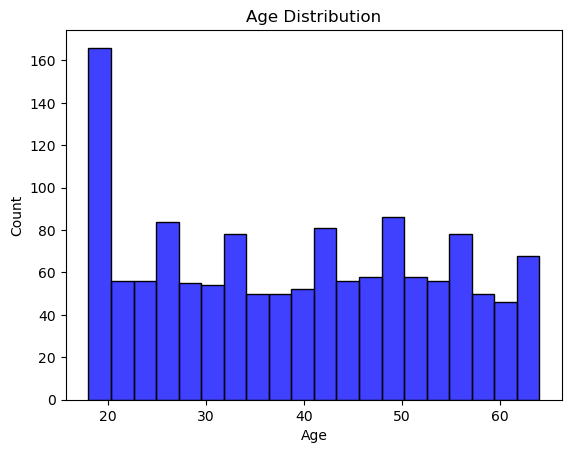

In [163]:
#age distribution
sns.histplot(df.age, bins=20, kde = False, color='Blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

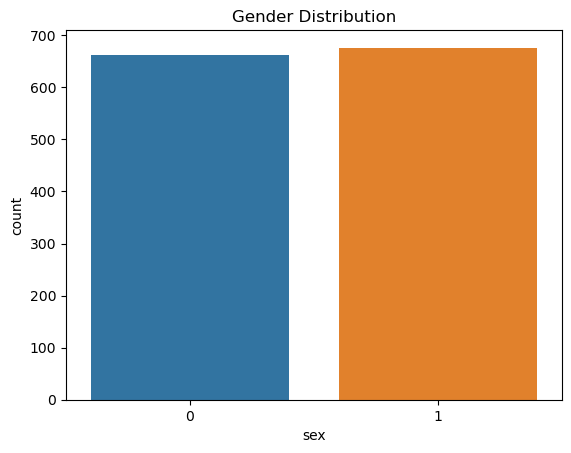

In [164]:
#gender plot
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')


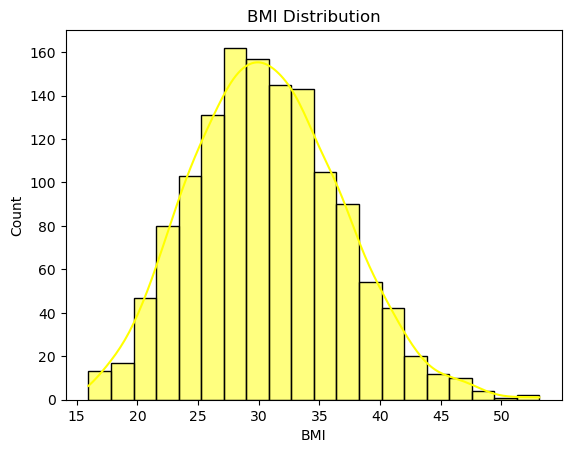

In [165]:
#bmi distribution
sns.histplot(df.bmi,bins=20, kde=True,color='Yellow')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

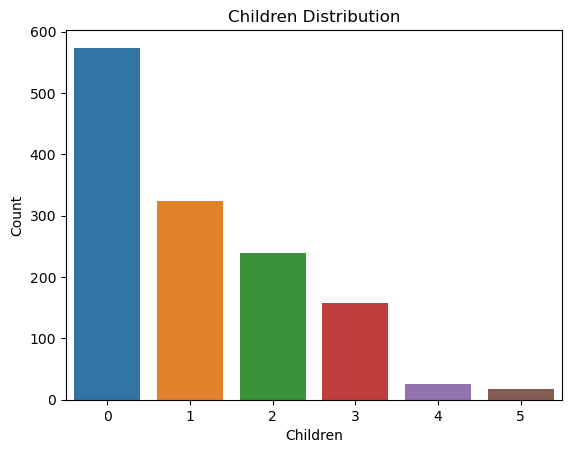

In [166]:
#child count distribution
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

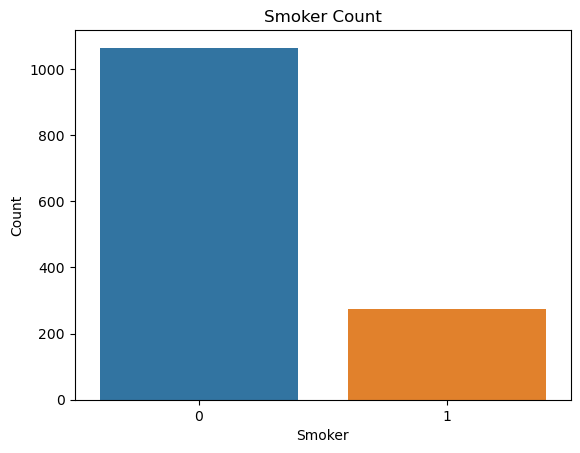

In [167]:
#count of smokers
sns.countplot(x = 'smokers', data = df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

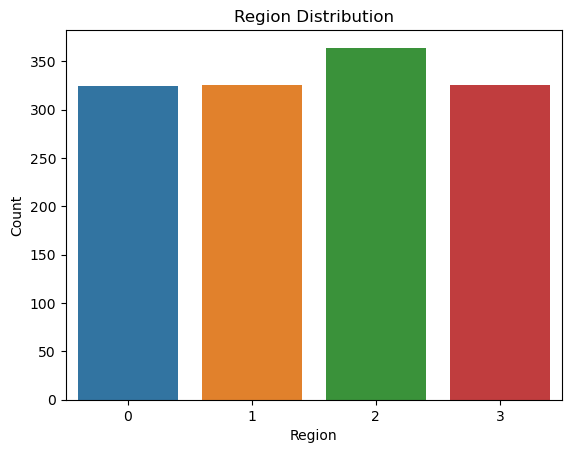

In [168]:
#regionwise plot
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='smokers', ylabel='count'>

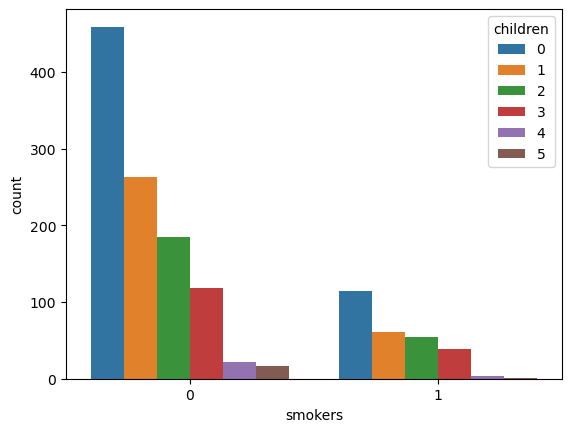

In [169]:
sns.countplot(x = df.smokers, hue = df.children)

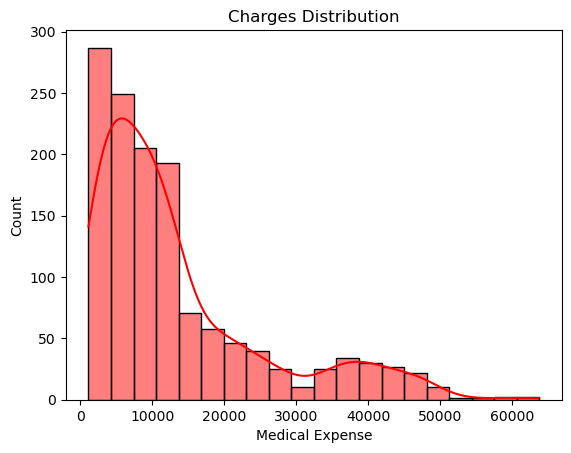

In [170]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

###### Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000.From all the above plots, we have a clear understanding about the count of patients under each category of the variables. Now I will look into the coorelation between the variables.

# <div style="background-color: ff5733#; padding: 5px; border-radius: 5px; text-align: center;"><h1 style="color: #fff; font-size: 14px; font-weight: bold;"></h1>Coorelation</div>


In [171]:
#coorelation matrix
df.corr()

,age,sex,bmi,children,smokers,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smokers,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


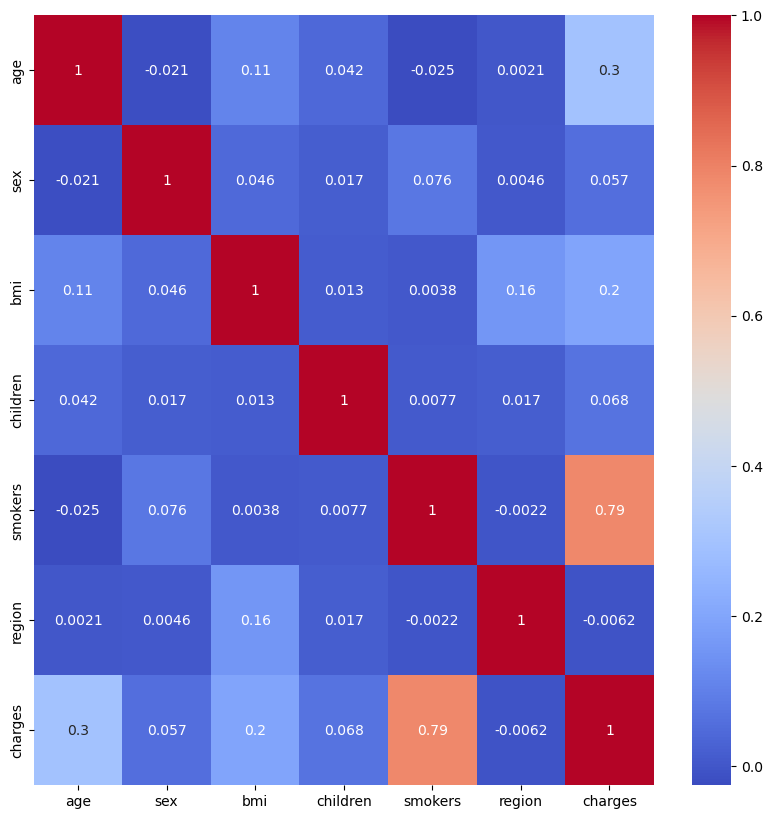

In [172]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

# <div style="background-color: ff5733#; padding: 5px; border-radius: 5px; text-align: center;"><h1 style="color: #fff; font-size: 14px; font-weight: bold;"></h1>Plotting the smoker count with patient's gender</div>


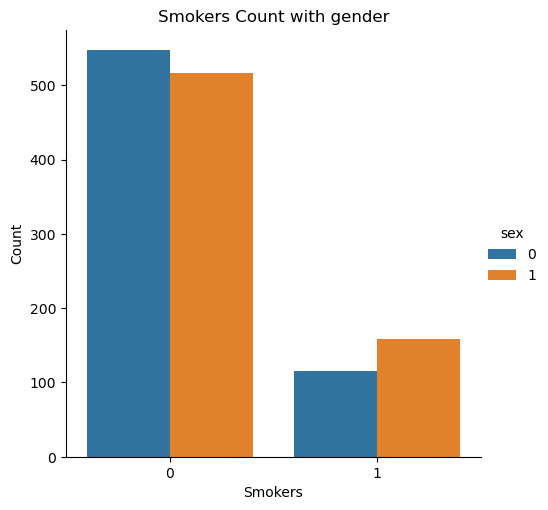

In [173]:
sns.catplot(x="smokers", kind="count",hue = 'sex', data=df)
plt.title('Smokers Count with gender')
plt.xlabel('Smokers')
plt.ylabel('Count')
plt.show()

###### Observing the data, it's apparent that there are more male smokers compared to female smokers. With this in mind, one might reasonably assume that medical treatment expenses for males could be higher than those for females, given the well-documented impact of smoking on medical costs.

<AxesSubplot:xlabel='sex', ylabel='charges'>

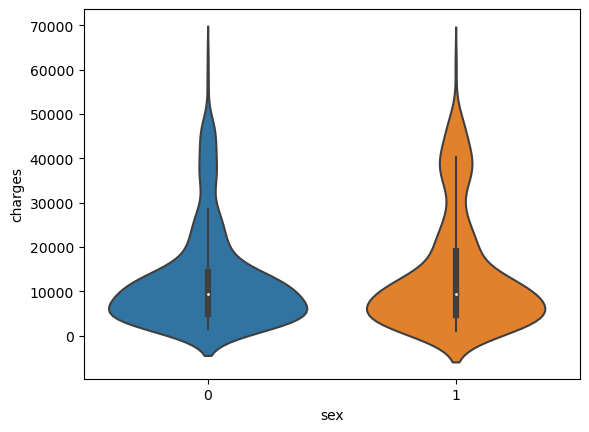

In [174]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smokers'>

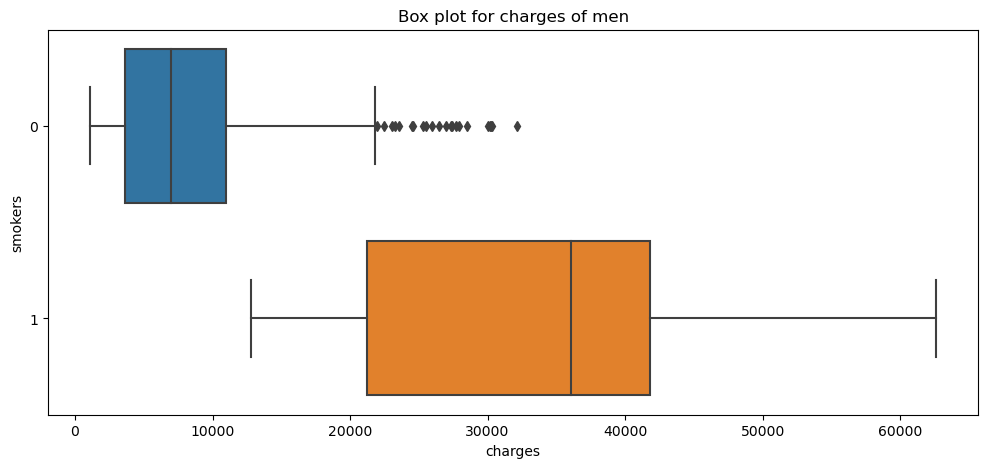

In [176]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smokers", x="charges", data =  df[(df.sex == 1)] , orient="h")

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smokers'>

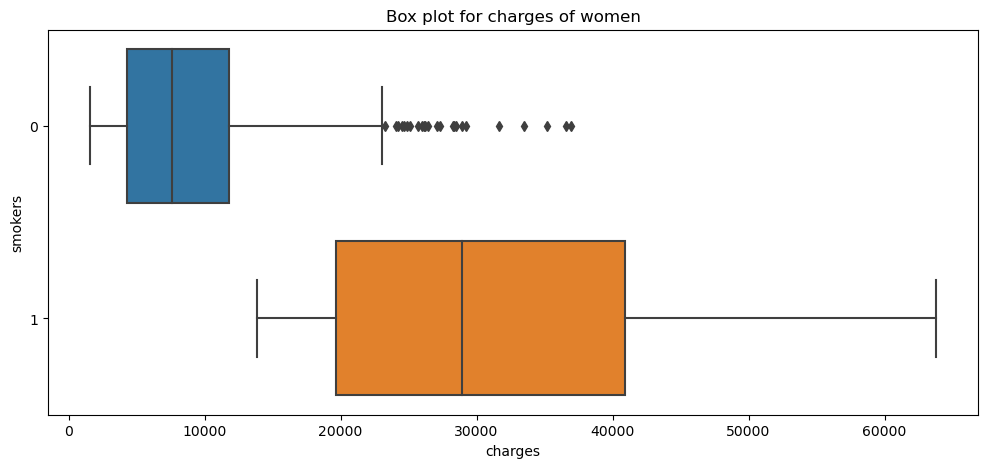

In [177]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smokers", x="charges", data =  df[(df.sex == 0)] , orient="h")

###### Indeed, the assumption holds true: medical expenses for males tend to be higher than those for females. Furthermore, it's worth noting that medical expenses for smokers surpass those for non-smokers.

# Smokers and age distribution

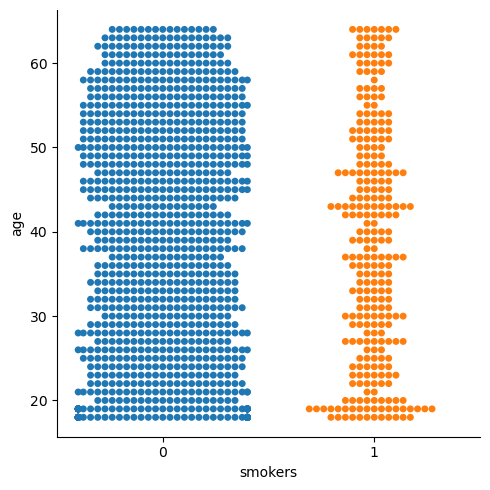

In [190]:
#smokers and age distribution
sns.catplot(x="smokers", y="age", kind="swarm", data=df)

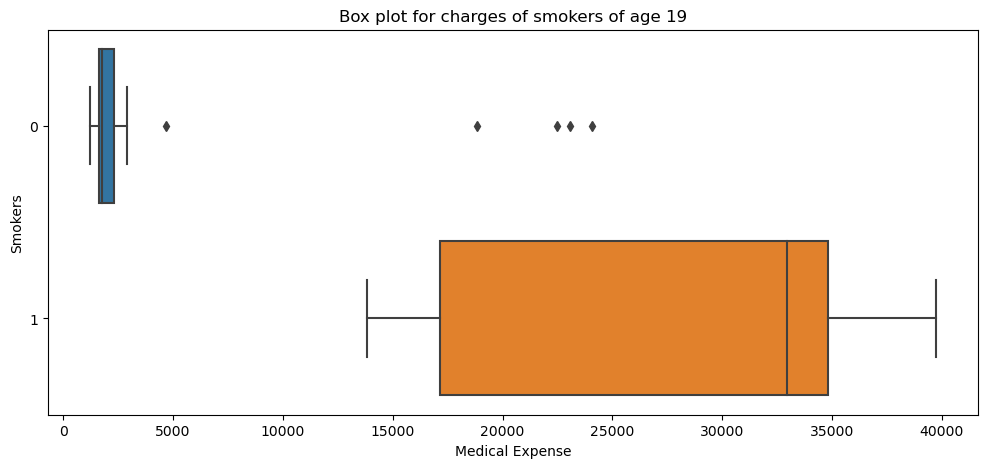

In [179]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smokers", x="charges", data =  df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smokers')
plt.show()

###### Remarkably, the medical expenses for 19-year-old smokers appear to be significantly higher compared to non-smokers. Within the non-smoker group, there are noticeable outliers, which could be attributed to illnesses or accidents.
###### The data unmistakably indicates that smokers generally incur higher medical expenses than non-smokers. To further illustrate this difference, I will create plots that visualize the distribution of charges relative to patients' ages, separately for smokers and non-smokers.

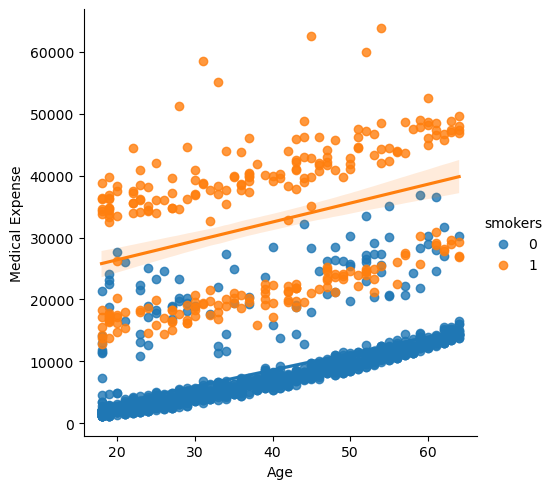

In [180]:
#age charges distribution

sns.lmplot(x="age", y="charges", data =  df, hue = 'smokers')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

#### Charges distribution for patients with BMI greater than 30 i.e. obese patients

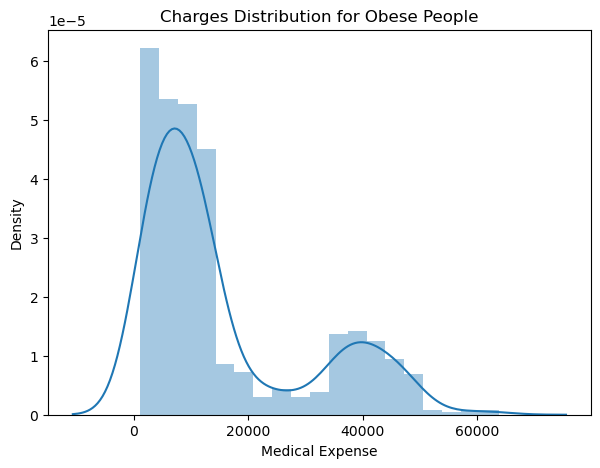

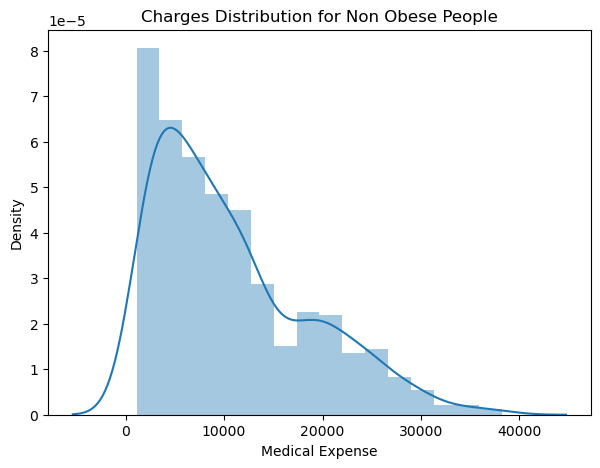

In [191]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

##### Hence, it's evident that individuals with a BMI less than 30 tend to have lower medical treatment expenses compared to those with a BMI greater than 30.Our exploratory data analysis (EDA) has provided valuable insights into the dataset and revealed correlations between various variables. With this understanding in place, the next step is to construct a predictive model to estimate the medical expenses of patients.

# Train Test Split

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=0)


<div style="background-color: #3498db; padding: 10px; border-radius: 5px; text-align: center;"><h1 style="color: #fff; font-size: 24px; font-weight: bold;">Model Building</h1></div>


# Linear Regression

In [218]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr

In [184]:
#model training
lr.fit(x_train,y_train)
#model accuracy
lr.score(x_train,y_train)

0.7368306228430945

In [185]:
#model prediction
y_pred = lr.predict(x_test)

<div style="background-color: #3498db; padding: 10px; border-radius: 5px; text-align: center;"><h1 style="color: #fff; font-size: 24px; font-weight: bold;">Model Evaluation</h1></div>


In [186]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Linear Regression

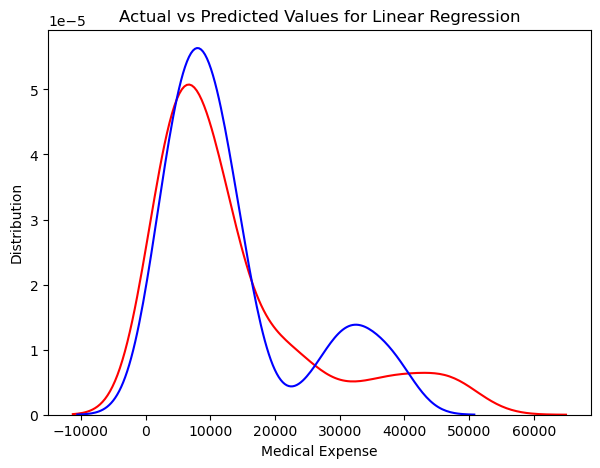

In [219]:
#distribution of actual and predicted values
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [193]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 3930.3332739011403
MSE: 31845929.134159435
RMSE: 5643.219748880902
R2 Score: 0.7998747145449959


## Save Our Model Using Joblib

In [194]:
lr = LinearRegression()
lr

LinearRegression()

In [223]:
#model training
lr.fit(x_train,y_train)
#model accuracy
lr.score(x_train,y_train)

0.7368306228430945

In [224]:
#model prediction
y_pred = lr.predict(x_test)

In [195]:
import joblib

In [198]:
joblib.dump(lr, 'model_joblib_lr')

['model_joblib_lr']

In [221]:
model = joblib.load('model_joblib_lr')

<div style="background-color: #3498db; padding: 10px; border-radius: 5px; text-align: center;"><h1 style="color: #fff; font-size: 24px; font-weight: bold;">GUI for Predict the Cost</h1></div>


In [23]:
import tkinter as tk
from tkinter import ttk

# Function to update the BMI label
def update_bmi_label(event):
    bmi_label_var.set(f"BMI: {bmi_slider.get():.1f}")

# Function to perform the prediction
def predict_expense():
    age = age_entry.get()
    try:
        age = float(age)
        bmi = bmi_slider.get()
        smokers = smokers_var.get()

        # Replace this with your actual prediction logic
        predicted_expense = 1000 + (age * 10) + (bmi * 20)
        if smokers:
            predicted_expense += 1000

        result_label.config(text=f'Predicted Medical Expense: ₹{predicted_expense:.2f}')
    except ValueError:
        result_label.config(text='Please enter a valid age.')

# Function to exit the application
def exit_application():
    root.destroy()

# Create a Tkinter window
root = tk.Tk()
root.title("Medical Health Insurance Cost Price Prediction")

# Create and configure a frame
frame = ttk.Frame(root)
frame.pack(padx=20, pady=20)

# Create and configure labels and input widgets
heading_label = ttk.Label(frame, text="Medical Health Price Prediction", font=("Helvetica", 16))
heading_label.grid(row=0, column=0, columnspan=2, pady=10)

age_label = ttk.Label(frame, text="Age:")
age_label.grid(row=1, column=0)
age_entry = ttk.Entry(frame)
age_entry.grid(row=1, column=1)

bmi_label_var = tk.StringVar()
bmi_label_var.set(f"BMI: {15.0}")  
bmi_label = ttk.Label(frame, textvariable=bmi_label_var)
bmi_label.grid(row=2, column=0)
bmi_slider = ttk.Scale(frame, from_=15, to=50, length=200, orient="horizontal", command=update_bmi_label)
bmi_slider.grid(row=2, column=1)

smokers_label = ttk.Label(frame, text="Smokers:")
smokers_label.grid(row=3, column=0)
smokers_var = tk.BooleanVar()
smokers_checkbox = ttk.Checkbutton(frame, text="Yes", variable=smokers_var)
smokers_checkbox.grid(row=3, column=1)

predict_button = ttk.Button(frame, text="Predict Expense", command=predict_expense)
predict_button.grid(row=4, column=0, columnspan=2, pady=10)

exit_button = ttk.Button(frame, text="Exit", command=exit_application)
exit_button.grid(row=5, column=0, columnspan=2, pady=10)

result_label = ttk.Label(frame, text="", font=("Helvetica", 14))
result_label.grid(row=6, column=0, columnspan=2, pady=10)

# Start the Tkinter event loop
root.mainloop()
